<a href="https://colab.research.google.com/github/virsalee27/Tugas_PCD/blob/main/BrainTumorKlasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Skrip Pembagian Dataset Tumor Otak

Skrip ini digunakan untuk membagi dataset gambar tumor otak menjadi tiga direktori: `TRAIN`, `VAL`, dan `TEST`. Skrip ini juga akan mengorganisir gambar ke dalam subfolder sesuai label (`yes` dan `no`), yang menunjukkan apakah gambar tersebut mengandung tumor otak atau tidak.

## Setup Direktori

1. **BASE_DIR**: Path untuk direktori dasar yang berisi dataset.
2. **TRAIN_DIR**: Path untuk data pelatihan (training).
3. **VAL_DIR**: Path untuk data validasi (validation).
4. **TEST_DIR**: Path untuk data pengujian (test).

Skrip ini akan membuat subdirektori di dalam `TRAIN`, `VAL`, dan `TEST` untuk label `yes` dan `no`.


## Pembagian Dataset

Dataset akan dibagi menjadi tiga bagian:
- **TRAIN**: 80% dari total gambar untuk pelatihan.
- **VAL**: 10% dari total gambar untuk validasi.
- **TEST**: 10% dari total gambar untuk pengujian.

Gambar-gambar akan diacak terlebih dahulu untuk memastikan pembagian data yang lebih acak dan tidak bias.


In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke direktori dataset awal
BASE_DIR = "/content/drive/My Drive/brain_tumor_dataset"  # Sesuaikan path ini jika dataset ada di lokasi berbeda

# Path untuk TRAIN, VAL, TEST
TRAIN_DIR = os.path.join(BASE_DIR, 'TRAIN')
VAL_DIR = os.path.join(BASE_DIR, 'VAL')
TEST_DIR = os.path.join(BASE_DIR, 'TEST')

# Membuat folder TRAIN, VAL, TEST beserta subfoldernya (yes/no)
for folder in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    for label in ['yes', 'no']:
        os.makedirs(os.path.join(folder, label), exist_ok=True)

# Fungsi untuk membagi dataset ke TRAIN, VAL, TEST
def split_data(base_path, train_dir, val_dir, test_dir):
    for label in ['yes', 'no']:
        # Path ke gambar dalam subfolder `yes` dan `no`
        label_dir = os.path.join(base_path, label)
        img_files = os.listdir(label_dir)
        np.random.shuffle(img_files)  # Acak urutan gambar

        # Hitung pembagian data
        total_images = len(img_files)
        train_split = int(0.8 * total_images)  # 80% data untuk TRAIN
        val_split = int(0.1 * total_images)  # 10% data untuk VAL (10% sisanya untuk TEST)

        for idx, img_file in enumerate(img_files):
            src = os.path.join(label_dir, img_file)

            if idx < train_split:
                dst = os.path.join(train_dir, label, img_file)
            elif idx < train_split + val_split:
                dst = os.path.join(val_dir, label, img_file)
            else:
                dst = os.path.join(test_dir, label, img_file)

            shutil.copy(src, dst)


# Pembuatan Folder TRAIN, VAL, dan TEST

Kode ini digunakan untuk memastikan struktur folder dataset sudah ada untuk setiap bagian dataset (`TRAIN`, `VAL`, dan `TEST`), dan setiap label (`YES` dan `NO`). Jika folder belum ada, kode akan secara otomatis membuatnya menggunakan fungsi `os.makedirs()`.


In [ ]:
# Pastikan folder TRAIN, VAL, dan TEST ada
os.makedirs(os.path.join(TRAIN_DIR, 'YES'), exist_ok=True)
os.makedirs(os.path.join(TRAIN_DIR, 'NO'), exist_ok=True)
os.makedirs(os.path.join(VAL_DIR, 'YES'), exist_ok=True)
os.makedirs(os.path.join(VAL_DIR, 'NO'), exist_ok=True)
os.makedirs(os.path.join(TEST_DIR, 'YES'), exist_ok=True)
os.makedirs(os.path.join(TEST_DIR, 'NO'), exist_ok=True)

#  Pemindahan Data dan Data Augmentation

Kode ini terdiri dari dua bagian utama:
1. **Pemindahan Data**: Memindahkan dataset ke dalam folder `TRAIN`, `VAL`, dan `TEST`.
2. **Data Augmentation**: Mempersiapkan data dengan augmentasi menggunakan `ImageDataGenerator` dari Keras.

---



In [ ]:

# Panggil fungsi untuk memindahkan data
split_data(BASE_DIR, TRAIN_DIR, VAL_DIR, TEST_DIR)

# Data Augmentation
IMG_SIZE = (150, 150)
datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator untuk TRAIN, VAL, dan TEST
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 253 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


# Visualisasi Jumlah Sampel Data

Kode ini digunakan untuk menampilkan jumlah sampel data pelatihan dan validasi, kemudian memvisualisasikan distribusinya dalam bentuk grafik batang menggunakan `matplotlib`.

## 1. Menampilkan Jumlah Sampel
### Kode:
```python
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")


## 2. Visualisasi Data Menggunakan Grafik Batang
labels = ['Training Samples', 'Validation Samples']
values = [train_generator.samples, validation_generator.samples]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Distribution of Training and Validation Samples')
plt.xlabel('Sample Type')
plt.ylabel('Number of Samples')
plt.show()


Training samples: 253
Validation samples: 156


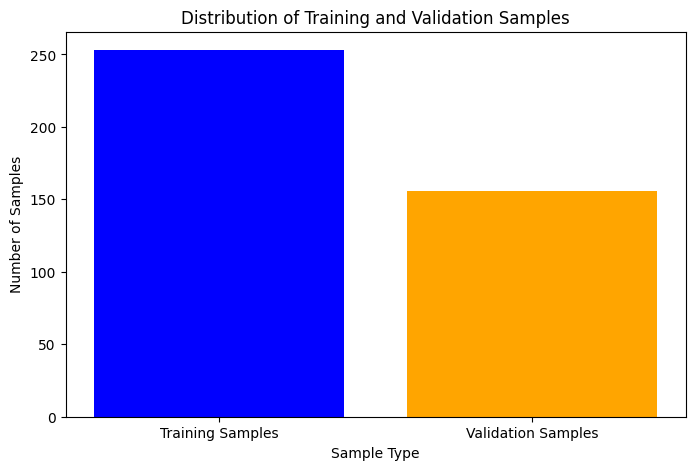

In [ ]:
import matplotlib.pyplot as plt

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")



# Visualisasi Data
labels = ['Training Samples', 'Validation Samples']
values = [train_generator.samples, validation_generator.samples]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Distribution of Training and Validation Samples')
plt.xlabel('Sample Type')
plt.ylabel('Number of Samples')
plt.show()

#  Menghitung dan Memvisualisasikan Distribusi Data

Kode ini bertujuan untuk menghitung jumlah gambar dalam setiap kategori (`YES` dan `NO`) pada folder `TRAIN`, `VAL`, dan `TEST`, serta memvisualisasikan distribusi jumlah gambar tersebut dalam bentuk grafik batang.

## 1. Fungsi untuk Menghitung Jumlah File
### Kode:
```python
def count_images(directory):
    categories = ['yes', 'no']
    counts = {}
    for category in categories:
        path = os.path.join(directory, category)
        counts[category] = len(os.listdir(path))
    return counts
    

## 2. Menghitung Distribusi Data untuk TRAIN, VAL, dan TEST
#kode:
```python
train_counts = count_images(TRAIN_DIR)
val_counts = count_images(VAL_DIR)
test_counts = count_images(TEST_DIR)


##3. Menyusun Data untuk Visualisasi
#kode:
```python
data = {
    "TRAIN": train_counts,
    "VAL": val_counts,
    "TEST": test_counts
}


##4. Visualisasi Distribusi Data
#kode
```python
labels = ['yes', 'no']
x = range(len(labels))

plt.figure(figsize=(12, 6))
for i, (dataset, counts) in enumerate(data.items()):
    plt.bar([p + i * 0.2 for p in x], [counts[label] for label in labels], width=0.2, label=dataset)

plt.xticks([p + 0.3 for p in x], labels)
plt.ylabel("Number of Images")
plt.title("Class Distribution: Tumor (YES) vs No Tumor (NO)")
plt.legend()
plt.show()


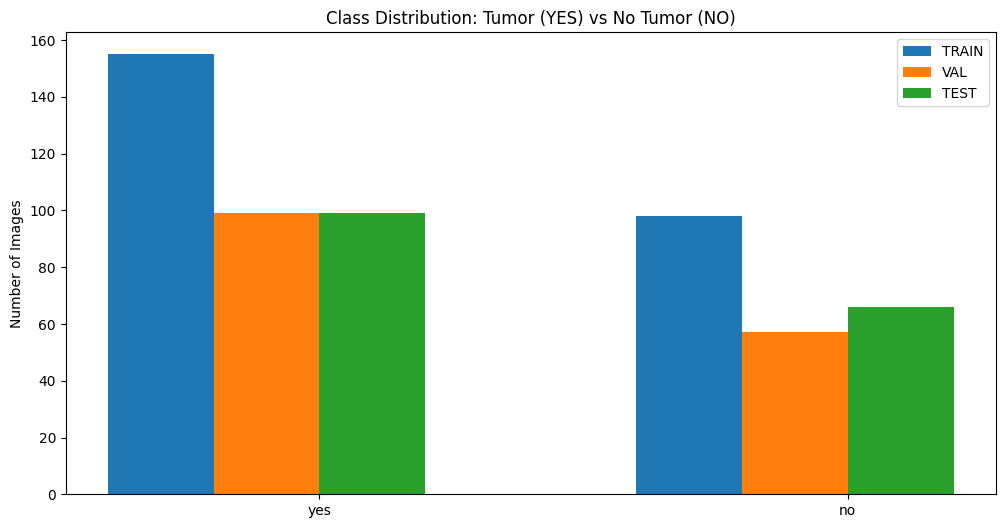

In [ ]:
import os
import matplotlib.pyplot as plt

def count_images(directory):
    categories = ['yes', 'no']
    counts = {}
    for category in categories:
        path = os.path.join(directory, category)
        counts[category] = len(os.listdir(path))
    return counts

train_counts = count_images(TRAIN_DIR)
val_counts = count_images(VAL_DIR)
test_counts = count_images(TEST_DIR)

data = {
    "TRAIN": train_counts,
    "VAL": val_counts,
    "TEST": test_counts
}

labels = ['yes', 'no']
x = range(len(labels))

plt.figure(figsize=(12, 6))
for i, (dataset, counts) in enumerate(data.items()):
    plt.bar([p + i * 0.2 for p in x], [counts[label] for label in labels], width=0.2, label=dataset)

plt.xticks([p + 0.3 for p in x], labels)
plt.ylabel("Number of Images")
plt.title("Class Distribution: Tumor (YES) vs No Tumor (NO)")
plt.legend()
plt.show()


#  Visualisasi Sampel Gambar dari Dataset

Kode ini bertujuan untuk memvisualisasikan beberapa sampel gambar dari kategori tertentu dalam dataset `TRAIN`, `VAL`, atau `TEST`. Fungsi ini akan menampilkan gambar-gambar dari kategori `YES` atau `NO` yang ada dalam direktori dataset.

## 1. Fungsi untuk Menampilkan Sampel Gambar
### Kode:
```python
def visualize_samples(directory, category, num_samples=5):
    """
    Menampilkan beberapa sampel gambar dari kategori tertentu di direktori dataset.
    Args:
        directory (str): Path direktori dataset (TRAIN, VAL, atau TEST).
        category (str): Kategori gambar ('YES' atau 'NO').
        num_samples (int): Jumlah sampel gambar yang ingin ditampilkan.
    """
    path = os.path.join(directory, category)
    images = os.listdir(path)[:num_samples]  # Ambil beberapa gambar
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = load_img(img_path, target_size=(150, 150))  # Resize ke ukuran yang digunakan dalam model
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()


##2. Menampilkan Sampel Gambar dari Kategori YES dan NO
#Kode:
```python
# Tampilkan sampel gambar dari kategori 'YES' dan 'NO' di TRAIN dataset
print("Sampel gambar kategori 'YES' (Tumor):")
visualize_samples(TRAIN_DIR, 'yes', num_samples=5)

print("Sampel gambar kategori 'NO' (No Tumor):")
visualize_samples(TRAIN_DIR, 'no', num_samples=5)


#  Visualisasi Sampel Gambar dari Dataset

Kode ini bertujuan untuk memvisualisasikan beberapa sampel gambar dari kategori tertentu dalam dataset `TRAIN`, `VAL`, atau `TEST`. Fungsi ini akan menampilkan gambar-gambar dari kategori `YES` atau `NO` yang ada dalam direktori dataset.

## 1. Fungsi untuk Menampilkan Sampel Gambar
### Kode:
```python
def visualize_samples(directory, category, num_samples=5):
    """
    Menampilkan beberapa sampel gambar dari kategori tertentu di direktori dataset.
    Args:
        directory (str): Path direktori dataset (TRAIN, VAL, atau TEST).
        category (str): Kategori gambar ('YES' atau 'NO').
        num_samples (int): Jumlah sampel gambar yang ingin ditampilkan.
    """
    path = os.path.join(directory, category)
    images = os.listdir(path)[:num_samples]  # Ambil beberapa gambar
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = load_img(img_path, target_size=(150, 150))  # Resize ke ukuran yang digunakan dalam model
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()


##2. Menampilkan Sampel Gambar dari Kategori YES dan NO
#kode:
```python
# Tampilkan sampel gambar dari kategori 'YES' dan 'NO' di TRAIN dataset
print("Sampel gambar kategori 'YES' (Tumor):")
visualize_samples(TRAIN_DIR, 'yo', num_samples=5)  # Perbaiki menjadi 'yes' untuk kategori Tumor

print("Sampel gambar kategori 'NO' (No Tumor):")
visualize_samples(TRAIN_DIR, 'no', num_samples=5)


Sampel gambar kategori 'YES' (Tumor):


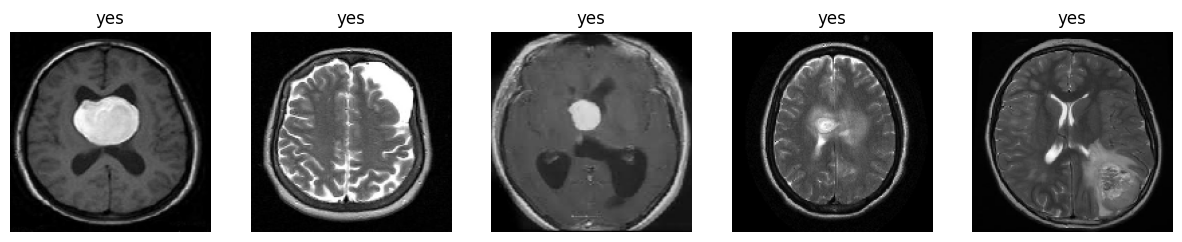

Sampel gambar kategori 'NO' (No Tumor):


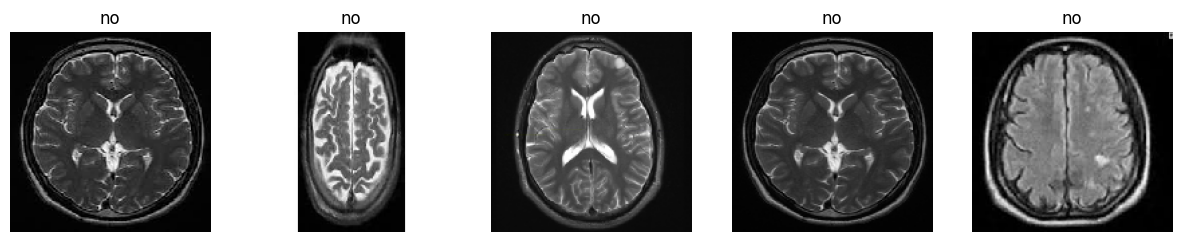

In [ ]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def visualize_samples(directory, category, num_samples=5):
    """
    Menampilkan beberapa sampel gambar dari kategori tertentu di direktori dataset.
    Args:
        directory (str): Path direktori dataset (TRAIN, VAL, atau TEST).
        category (str): Kategori gambar ('YES' atau 'NO').
        num_samples (int): Jumlah sampel gambar yang ingin ditampilkan.
    """
    path = os.path.join(directory, category)
    images = os.listdir(path)[:num_samples]  # Ambil beberapa gambar
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = load_img(img_path, target_size=(150, 150))  # Resize ke ukuran yang digunakan dalam model
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

# Tampilkan sampel gambar dari kategori 'YES' dan 'NO' di TRAIN dataset
print("Sampel gambar kategori 'YES' (Tumor):")
visualize_samples(TRAIN_DIR, 'yes', num_samples=5)

print("Sampel gambar kategori 'NO' (No Tumor):")
visualize_samples(TRAIN_DIR, 'no', num_samples=5)


# Model CNN untuk Klasifikasi Citra

Kode ini menunjukkan cara membangun dan melatih model Convolutional Neural Network (CNN) untuk mengklasifikasikan gambar. Model ini digunakan untuk mendeteksi tumor otak dengan dua kategori: `YES` (Tumor) dan `NO` (No Tumor).

## 1. Import Libraries
### Kode:
```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



## 2. Membuat Model CNN
#Kode:
```python
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])





## 3. Mengkompilasi Model
# Kode:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Melatih Model CNN

Kode ini digunakan untuk melatih model CNN yang telah dibangun sebelumnya dengan menggunakan data pelatihan (`train_generator`) dan data validasi (`validation_generator`). Selain itu, digunakan juga teknik **EarlyStopping** untuk menghentikan pelatihan jika model tidak menunjukkan peningkatan dalam akurasi validasi.

## 1. Parameter Pelatihan
### Kode:
```python
EPOCHS = 30



##2. EarlyStopping Callback
#Kode:
```python
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=6)



##3. Melatih Model
#Kode:
```python
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[es]
)


In [ ]:
# Training Model
EPOCHS = 30
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=6)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[es]
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6370 - loss: 0.9083 - val_accuracy: 0.7821 - val_loss: 0.5073
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7810 - loss: 0.5172 - val_accuracy: 0.8077 - val_loss: 0.4362
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8183 - loss: 0.4833 - val_accuracy: 0.8269 - val_loss: 0.3993
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8086 - loss: 0.4435 - val_accuracy: 0.8590 - val_loss: 0.3685
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8523 - loss: 0.3952 - val_accuracy: 0.8654 - val_loss: 0.2811
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8541 - loss: 0.3700 - val_accuracy: 0.9167 - val_loss: 0.2058
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9340 - loss: 0.2308 - val_accuracy: 0.9359 - val_loss: 0.1377
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9855 - loss: 0.0994 - val_accuracy: 0.9359 - val_loss: 0.1248
Epoch 9/30
8/8 ━━━━